In [4]:
pwd

'/home/wsuser/work'

In [5]:
!pip install keras==2.0.6
!pip install tensorflow==2.5.0

In [2]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='awspE-NNBERsl6Ii-moA_KAw4kbo62C1AqSo_lCVMsJr',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'aipowerednutritionanalysisforfitn-donotdelete-pr-ooscpzjstyyhqf'
object_key = 'Dataset.zip'

streaming_body_4 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']
# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
metadata_3 = {
    'IAM_SERVICE_ID': 'iam-ServiceId-58a7f555-848c-4b98-994a-d6e9995ec7e2',
    'IBM_API_KEY_ID': 'awspE-NNBERsl6Ii-moA_KAw4kbo62C1AqSo_lCVMsJr',
    'ENDPOINT': 'https://s3.private.us.cloud-object-storage.appdomain.cloud',
    'IBM_AUTH_ENDPOINT': 'https://iam.cloud.ibm.com/oidc/token',
    'BUCKET': 'aipowerednutritionanalysisforfitn-donotdelete-pr-ooscpzjstyyhqf',
    'FILE': 'Dataset.zip'
}
# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/
if not hasattr(streaming_body_4,"__iter__"):streaming_body_4.__iter__=types.MethodType(__iter__,streaming_body_4)

In [3]:
from io import BytesIO
import zipfile
unzip=zipfile.ZipFile(BytesIO(streaming_body_4.read()),'r')
file_paths=unzip.namelist()
for i in file_paths:
    unzip.extract(i) 

In [4]:
pwd

'/home/wsuser/work'

In [6]:
import os
filenames=os.listdir('/home/wsuser/work/Dataset/TRAIN_SET')

In [9]:
from keras.preprocessing.image import ImageDataGenerator

In [10]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen =ImageDataGenerator(rescale=1./255)

In [11]:
x_train = train_datagen.flow_from_directory(r'/home/wsuser/work/Dataset/TRAIN_SET/TRAIN_SET',target_size=(64, 64),batch_size=5,color_mode='rgb',class_mode='sparse')
x_test = test_datagen.flow_from_directory(r'/home/wsuser/work/Dataset/TEST_SET-20221101T044129Z-001/TEST_SET' ,target_size=(64, 64),batch_size=5,color_mode='rgb',class_mode='sparse')

Found 2626 images belonging to 5 classes.
Found 1055 images belonging to 5 classes.


In [12]:
print (x_train.class_indices)

{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}


In [13]:
print(x_test.class_indices)

{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}


In [14]:
from collections import Counter as c
c(x_train.labels)



Counter({0: 606, 1: 445, 2: 479, 3: 621, 4: 475})

In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten


In [16]:
import numpy as np

In [17]:
import tensorflow

In [18]:
from tensorflow.keras.models import Sequential

In [19]:
from tensorflow.keras import layers

In [20]:
from tensorflow.keras.layers import Dense, Flatten

In [21]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout

In [22]:
from keras.preprocessing.image import ImageDataGenerator

In [23]:
model=Sequential()

In [24]:
model.add(Conv2D(32,3,3,input_shape=(64,64,3),activation='relu'))

In [25]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [26]:
model.add(Flatten())

In [27]:
#model.add(Dense(output_dim=128,activation='relu',init='random_uniform'))

In [28]:
#model.add(Dense(output_dim=1,activation='sigmoid',init='random_uniform'))

In [29]:
classifier = Sequential()

In [30]:
classifier.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

In [31]:
classifier.add(Conv2D(32, (3, 3), activation='relu'))

 




In [32]:
classifier.add(MaxPooling2D(pool_size=(2, 2)))


In [33]:
classifier.add(Flatten())

In [34]:
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=5, activation='softmax'))

In [35]:
classifier.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)              

In [36]:
classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [37]:
classifier.fit_generator(
         generator=x_train,steps_per_epoch = len(x_train),
         epochs=10, validation_data=x_test,validation_steps = len(x_test))

/tmp/wsuser/ipykernel_164/1881611701.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  classifier.fit_generator(


Epoch 1/10
526/526 [==============================] - 13s 24ms/step - loss: 0.1404 - accuracy: 0.9497 - val_loss: 0.0125 - val_accuracy: 1.0000
Epoch 2/10
526/526 [==============================] - 13s 24ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0176 - val_accuracy: 0.9858
Epoch 3/10
526/526 [==============================] - 13s 24ms/step - loss: 9.4735e-05 - accuracy: 1.0000 - val_loss: 0.0133 - val_accuracy: 0.9953
Epoch 4/10
526/526 [==============================] - 13s 24ms/step - loss: 1.0113e-04 - accuracy: 1.0000 - val_loss: 0.0262 - val_accuracy: 0.9820
Epoch 5/10
526/526 [==============================] - 13s 24ms/step - loss: 2.8839e-05 - accuracy: 1.0000 - val_loss: 0.0100 - val_accuracy: 0.9972
Epoch 6/10
526/526 [==============================] - 13s 24ms/step - loss: 2.1687e-05 - accuracy: 1.0000 - val_loss: 0.0237 - val_accuracy: 0.9820
Epoch 7/10
526/526 [==============================] - 13s 24ms/step - loss: 1.0292e-05 - accuracy: 1.0000 - val_loss: 0.

In [38]:
classifier.save('nutrition.h5')

In [39]:
!tar -zcvf nut_deployment.tgz nutrition.h5

nutrition.h5


In [40]:
ls -1

Dataset/
nut_deployment.tgz
nutrition.h5


In [41]:
!pip install watson-machine-learning-client --upgrade

     |████████████████████████████████| 538 kB 20.1 MB/s eta 0:00:01


# Cloud Deploy

In [42]:
from ibm_watson_machine_learning import APIClient
credentials ={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"d7GqeyN_IRsUh8TwLZeQQn8wiuWMHZUaOqNawVtYTQBE"
}
client = APIClient(credentials)
client

In [43]:
client.spaces.get_details()

{'resources': [{'entity': {'description': '',
    'name': 'Nutrition Analysis',
    'scope': {'bss_account_id': 'f49da8cebf364168881b484a115dc92f'},
    'stage': {'production': False},
    'status': {'state': 'active'},
    'storage': {'properties': {'bucket_name': '9bfb85bc-a6f0-412e-a08e-06356d5ada45',
      'bucket_region': 'us-south',
      'credentials': {'admin': {'access_key_id': 'a25d4251c21243b9a839f1e40efa1bc3',
        'api_key': 'k_ye-B7z5qaXrzQvMAb6Bea_zHWHrL2hsCABAqICEnfU',
        'secret_access_key': 'b12acdd50e1075b4d469026bbb32558f457ed49fdee36532',
        'service_id': 'ServiceId-2714286d-1391-4256-9b32-441444e5b42f'},
       'editor': {'access_key_id': '446d4dc5e6604555a1a246bb055c00e8',
        'api_key': '2EHz-zlBLB6623xtJzx79Y4E8pDDGecp22YW3nqvQ4dx',
        'resource_key_crn': 'crn:v1:bluemix:public:cloud-object-storage:global:a/f49da8cebf364168881b484a115dc92f:9ad8e474-cb8e-484c-929a-102a0bc26867::',
        'secret_access_key': '528ab32f4683d920ee7bd5a8e16380

In [44]:
def guid_from_space_name(client,deploy):
    space = client.spaces.get_details()
    return (next(item for item in space['resources'] if item['entity']['name']==deploy)['metadata']['id'])

In [45]:
space_uid = guid_from_space_name(client,'Nutrition Analysis')
print("Space UID = " + space_uid)

Space UID = 6e1d825c-486a-4267-9dea-32d88bca8079


In [46]:
client.set.default_space(space_uid)

'SUCCESS'

In [47]:
client.software_specifications.list(limit=100)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

In [48]:
software_space_uid = client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [ ]:
model_details = client.repository.store_model(model='nut_deployment.tgz',meta_props={
    client.repository.ModelMetaNames.NAME:"Nutririon Analysis",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})

In [31]:
from tensorflow.keras.models import load_model

In [32]:
from keras.preprocessing import image
from tensorflow.keras.preprocessing import image 
model = load_model("nutrition.h5")

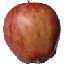

In [39]:
img = image.load_img(r"C:\Users\pc\Desktop\CN lab\TEST_SET-20221101T044129Z-001\TEST_SET\APPLES\3_100.jpg", grayscale=False,target_size= (64,64))
img


In [40]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred = np.argmax(model.predict(x)) 
pred

1/1 [==============================] - 0s 28ms/step


3

In [41]:
labels=['APPLES', 'BANANA', 'ORANGE','PINEAPPLE','WATERMELON']
labels[np.argmax(pred)]

'APPLES'